In [1]:
#Connecting My Google Drive with Colab

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Importing Libraries

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import style

#Importing necessary libraries for Natural Language Processing on the dataset
import nltk  #Natural Language Toolkit
import re  #For regular expressions
nltk.download('stopwords')
from nltk.corpus import stopwords  #stopwords are those which are meant to be ignored
from nltk.stem.porter import PorterStemmer  #Data Mining

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data Analysis

In [3]:
#Loading the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [4]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
data.shape

(1000, 2)

In [6]:
data.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

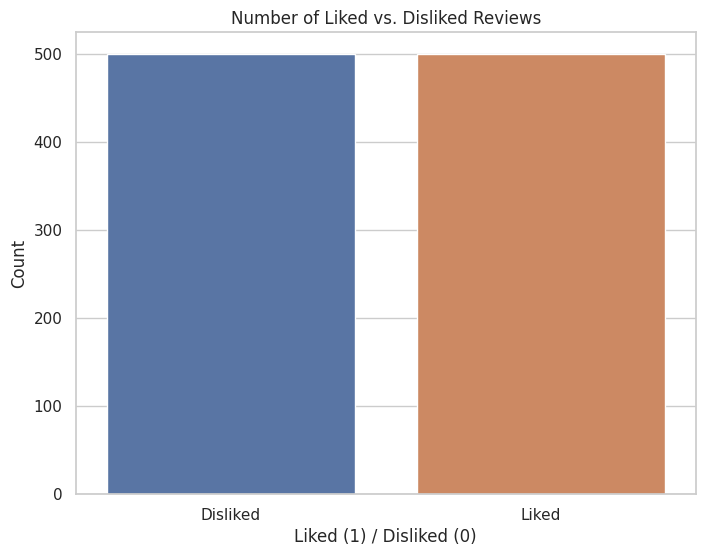

In [9]:
# Count the number of liked and disliked reviews
liked_counts = data['Liked'].value_counts()

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=liked_counts.index, y=liked_counts.values)
plt.title('Number of Liked vs. Disliked Reviews')
plt.xlabel('Liked (1) / Disliked (0)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Disliked', 'Liked'])

# Show the plot
plt.show()

In [10]:
from wordcloud import WordCloud


## Data Preprocessing

In [12]:
#Now we'll clean the reviews
corpus=[]
for i in range(1000):

  #Cleaning special characters
  review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])

  #Converting in lower case
  review = review.lower()

  #Converting the review into set of tokens
  review_words = review.split()

  #Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  #Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  #Joining the stemmed words
  review = ' '.join(review)

  #Creating a corpus for our use
  corpus.append(review)

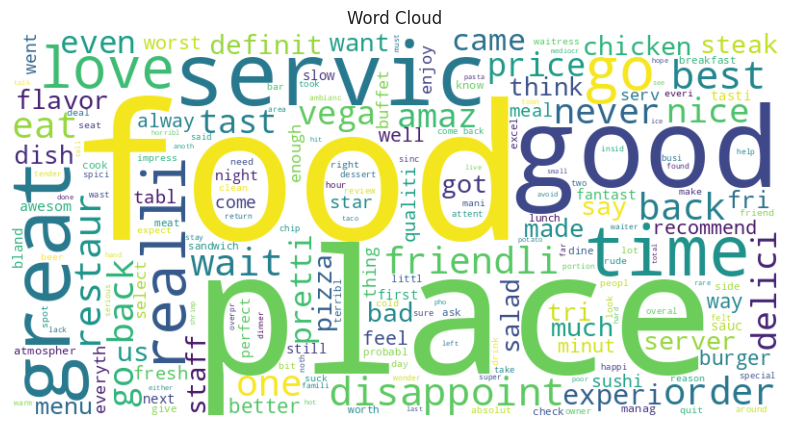

In [13]:
text = " ".join(corpus)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud')
plt.show()

In [ ]:
#Viewing the corpus
corpus[:]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
#Creating a bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

Now We will split the data into two halves
1. Training Data - Using this set of data we will train the model
2. Testing Data - Using this set of data we will check the accuracy of the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((800, 1500), (800,), (200, 1500), (200,))

## Training the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.705


In [ ]:
score1 = accuracy_score(Y_test,y_pred)
score2 = precision_score(Y_test,y_pred)
score3 = recall_score(Y_test,y_pred)

print("-----SCORES-----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

-----SCORES-----
Accuracy score is: 70.5%
Precision score is: 81.69%
Recall score is: 55.77%


In [ ]:
print(confusion_matrix(Y_test,y_pred))
print("\n")
print(classification_report(Y_test,y_pred))

[[83 13]
 [46 58]]


              precision    recall  f1-score   support

           0       0.64      0.86      0.74        96
           1       0.82      0.56      0.66       104

    accuracy                           0.70       200
   macro avg       0.73      0.71      0.70       200
weighted avg       0.73      0.70      0.70       200



So using **Random Forest Classification** we are getting an accuracy of **70.5%**